<a href="https://colab.research.google.com/github/vaibhav251999/Projects/blob/main/sales_walmart_stationary_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                    Value
Date                     
July 31, 2021     141.05B
April 30, 2021    138.31B
January 31, 2021  152.08B
October 31, 2020  134.71B
July 31, 2020     137.74B
              Value
Date               
2021-07-31  141.05B
2021-04-30  138.31B
2021-01-31  152.08B
2020-10-31  134.71B
2020-07-31  137.74B


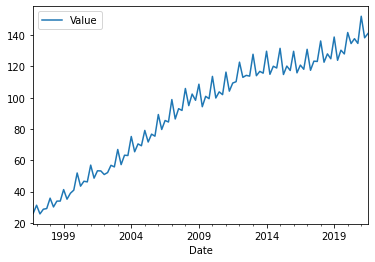

,Value
Date,
1996-10-31,26.08
1997-01-31,31.25
1997-04-30,25.70
1997-07-31,28.70
1997-10-31,29.13


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from math import sqrt
from numpy import array
from numpy import mean
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
#from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error

data=pd.read_csv("https://raw.githubusercontent.com/rian-dolphin/Walmart_LSTM/main/WMT_Earnings.csv",index_col='Date')

print(data.head())
# there is one value named Data which we need to drop 
data.drop('Date',axis=0,inplace=True)
# Converting the dates into time series format
data.index=pd.to_datetime(data.index)
print(data.head())
data=data.iloc[::-1]
data.Value=[float(data.Value[x][:-1]) for x in range(len(data.values))]
data.plot()
plt.show()

data.head()



In [ ]:
names=['log','log_diff4','log_diff4_demeaned',' log_diff4_demeaned_diff1']
d=pd.DataFrame()
d[names[0]]=np.log(data.Value) # stabalizing the variance 

d[names[1]]=data_log.diff(periods=4) # differencing   (removing seasonality)

d[names[2]]=result1 -mean(result1.dropna())  # demeaned series  removing trend

d[names[3]]=result2.dropna().diff(periods=1) # differencing   (removing seasonality)



In [ ]:
d.head(10)

,log,log_diff4,log_diff4_demeaned,log_diff4_demeaned_diff1
Date,,,,
1996-10-31,3.261169,NaN,NaN,NaN
1997-01-31,3.442019,NaN,NaN,NaN
1997-04-30,3.246491,NaN,NaN,NaN
1997-07-31,3.356897,NaN,NaN,NaN
1997-10-31,3.371769,0.110600,0.042896,NaN
1998-01-31,3.577110,0.135090,0.067386,0.024490
1998-04-30,3.406517,0.160026,0.092322,0.024935
1998-07-31,3.522825,0.165928,0.098224,0.005902
1998-10-31,3.524005,0.152236,0.084532,-0.013692


In [ ]:
d.tail(10)

,log,log_diff4,log_diff4_demeaned,log_diff4_demeaned_diff1
Date,,,,
2019-04-30,4.819636,0.009975,-0.057728,-0.008348
2019-07-31,4.870453,0.018189,-0.049515,0.008213
2019-10-31,4.851952,0.024519,-0.043185,0.006330
2020-01-31,4.953500,0.020538,-0.047165,-0.003980
2020-04-30,4.902456,0.082820,0.015116,0.062281
2020-07-31,4.925368,0.054915,-0.012789,-0.027905
2020-10-31,4.903124,0.051172,-0.016532,-0.003742
2021-01-31,5.024407,0.070906,0.003202,0.019734
2021-04-30,4.929498,0.027042,-0.040662,-0.043865
